In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from detection import Detector
from traindet.train_utils import get_dataset

In [3]:
_, val_ds, _ = get_dataset('real')

In [4]:
img = val_ds[0][0].asnumpy().astype('int')
img.shape

(600, 800, 3)

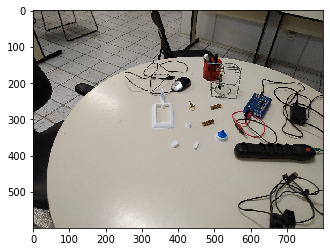

In [5]:
plt.imshow(img);

In [6]:
det = Detector(model='ssd512', dataset='real', ctx='gpu')

In [7]:
bboxes, _ = det.detect(img)

In [8]:
bboxes

[Bbox(326.56, 251.90, 390.61, 330.16, class_id=2, score=1.00, class_name='button_pad'),
 Bbox(377.08, 357.03, 403.59, 384.69, class_id=3, score=0.86, class_name='part1'),
 Bbox(417.49, 304.49, 436.53, 328.24, class_id=5, score=0.75, class_name='part3'),
 Bbox(440.38, 361.58, 458.76, 388.09, class_id=4, score=0.62, class_name='part2'),
 Bbox(498.84, 327.02, 536.63, 365.81, class_id=1, score=0.62, class_name='dosing_nozzle'),
 Bbox(403.41, 360.27, 423.86, 386.88, class_id=3, score=0.53, class_name='part1')]

In [9]:
dimg = bboxes.draw(img)

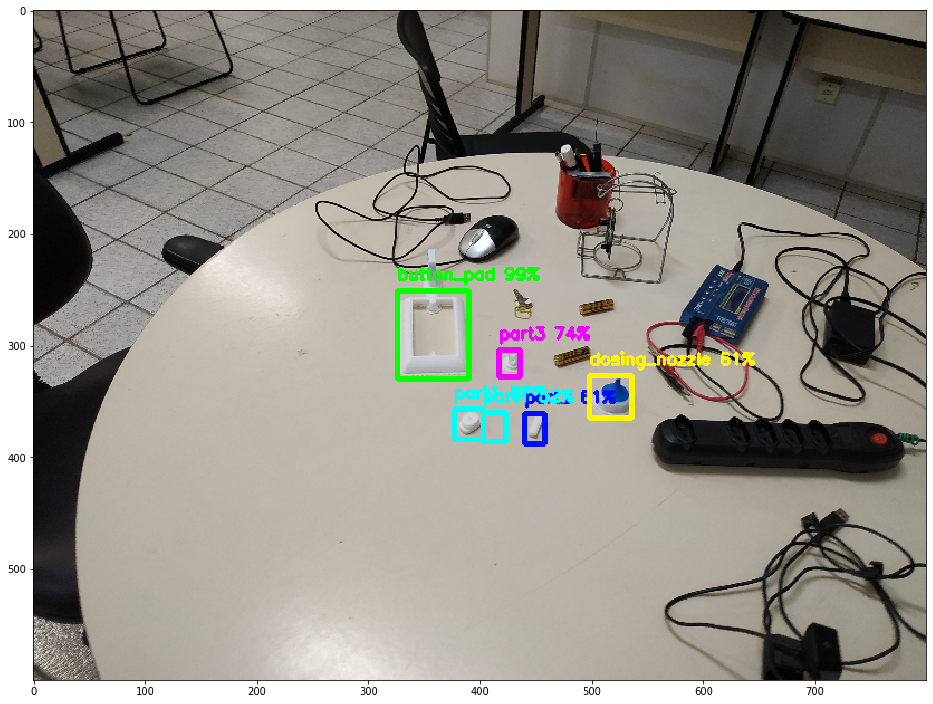

In [10]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.imshow(dimg)

In [11]:
ids, scores, bboxes_arr = bboxes.to_arrays()

In [12]:
bbox = bboxes[0]

In [13]:
bbox.center_width_height()

array([358.58521461, 291.03375077,  64.05339241,  78.25781107])

In [14]:
bbox.xyxy()

array([326.55851841, 251.90484524, 390.61191082, 330.16265631])

In [15]:
bbox.yxyx()

array([251.90484524, 326.55851841, 330.16265631, 390.61191082])

In [16]:
cimg = bbox.cropped_image(img, border=0.1)

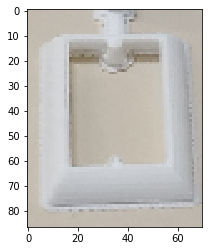

In [17]:
plt.imshow(cimg)